Training Logistic Regression model...
Model training complete.

--- Test Set Evaluation ---
Generating Confusion Matrix for Test Set...


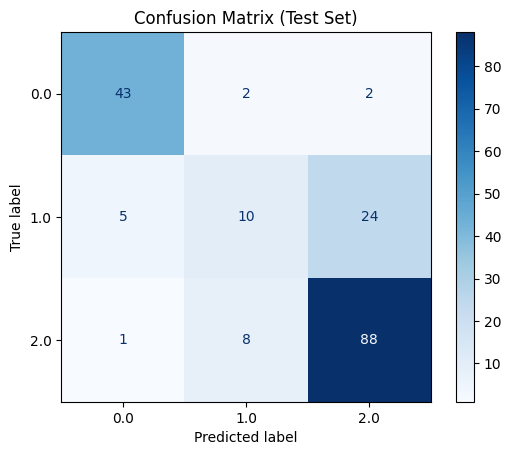


Generating One-vs-Rest ROC Curves for Test Set...


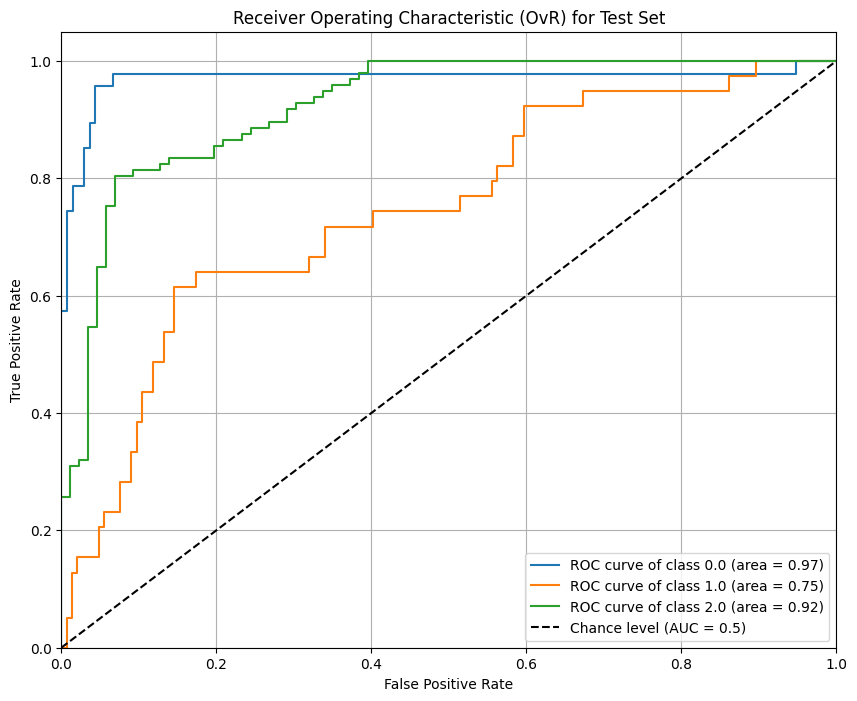


--- Training Set Evaluation ---
Generating Confusion Matrix for Training Set...


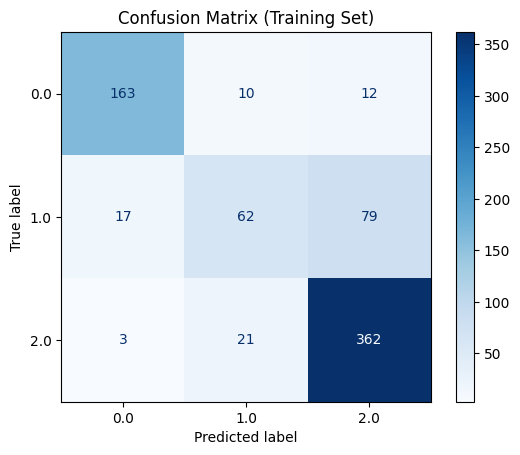


Generating One-vs-Rest ROC Curves for Training Set...


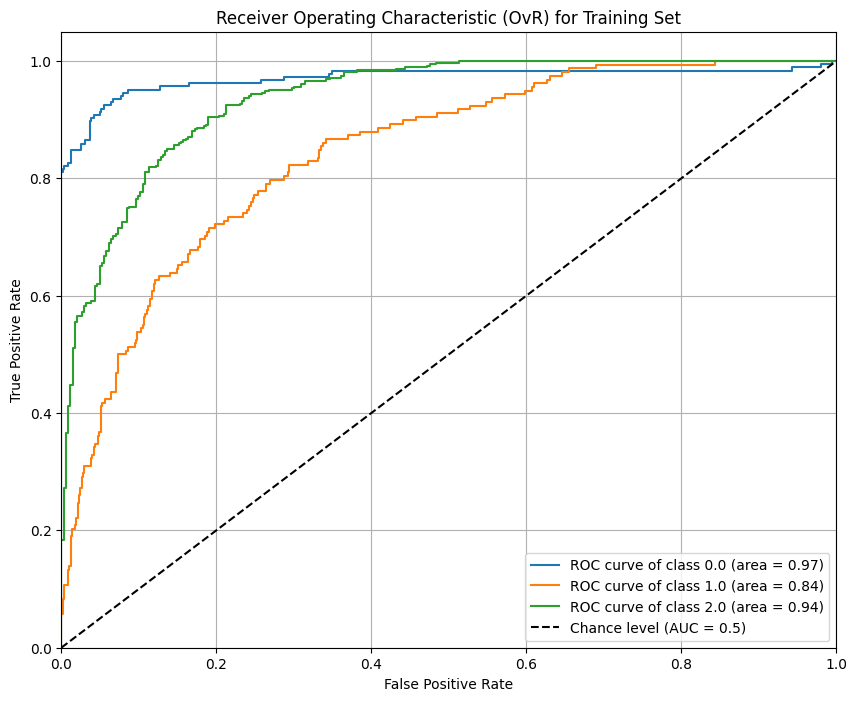

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelBinarizer
import numpy as np # Import numpy
from sklearn.model_selection import train_test_split # Import train_test_split
from sklearn.linear_model import LogisticRegression # Import LogisticRegression

# Load the data
X = np.load('/content/X.npy')
y = np.load('/content/y.npy')

# Split data into training and testing sets
# Using a common random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # stratify=y is good for classification

# Initialize and train the Logistic Regression model
print("Training Logistic Regression model...")
model = LogisticRegression(max_iter=1000, solver='liblinear') # Increased max_iter for convergence, liblinear for multiclass/binary
model.fit(X_train, y_train)
print("Model training complete.")

# Get unique class labels from y to ensure correct labels in the plot
class_labels = np.unique(y)

# Make predictions for evaluation
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)


# --- Evaluation for Test Set ---
print("\n--- Test Set Evaluation ---")

# Confusion Matrix for Test Set
print("Generating Confusion Matrix for Test Set...")
cm_test = confusion_matrix(y_test, y_pred)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=class_labels)
disp_test.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Test Set)')
plt.show()

# ROC Curve (One-vs-Rest) for Test Set
print("\nGenerating One-vs-Rest ROC Curves for Test Set...")
binarizer = LabelBinarizer()
y_test_binarized = binarizer.fit_transform(y_test)
y_score_test = model.predict_proba(X_test)

n_classes = len(class_labels)
fpr_test = dict()
tpr_test = dict()
roc_auc_test = dict()

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr_test[i], tpr_test[i], _ = roc_curve(y_test_binarized[:, i], y_score_test[:, i])
    roc_auc_test[i] = auc(fpr_test[i], tpr_test[i])
    plt.plot(fpr_test[i], tpr_test[i], label=f'ROC curve of class {class_labels[i]} (area = {roc_auc_test[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Chance level (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (OvR) for Test Set')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# --- Evaluation for Training Set ---
print("\n--- Training Set Evaluation ---")

# Confusion Matrix for Training Set
print("Generating Confusion Matrix for Training Set...")
cm_train = confusion_matrix(y_train, y_pred_train)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=class_labels)
disp_train.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Training Set)')
plt.show()

# ROC Curve (One-vs-Rest) for Training Set
print("\nGenerating One-vs-Rest ROC Curves for Training Set...")
binarizer = LabelBinarizer()
y_train_binarized = binarizer.fit_transform(y_train)
y_score_train = model.predict_proba(X_train)

fpr_train = dict()
tpr_train = dict()
roc_auc_train = dict()

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr_train[i], tpr_train[i], _ = roc_curve(y_train_binarized[:, i], y_score_train[:, i])
    roc_auc_train[i] = auc(fpr_train[i], tpr_train[i])
    plt.plot(fpr_train[i], tpr_train[i], label=f'ROC curve of class {class_labels[i]} (area = {roc_auc_train[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Chance level (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (OvR) for Training Set')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### Training Logistic Regression with Polynomial Features

Now, let's introduce polynomial features to our data to see if it improves the model's performance. We'll use `PolynomialFeatures` to create new features that are combinations and powers of the original features.

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import classification_report

# Create polynomial features
# You can adjust the 'degree' parameter (e.g., degree=3, degree=4)
# to explore higher-order polynomial interactions.
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

print(f"Original feature count: {X_train.shape[1]}")
print(f"Polynomial feature count: {X_train_poly.shape[1]}")

# Initialize and train a new Logistic Regression model on polynomial features
print("\nTraining Logistic Regression model with Polynomial Features...")
model_poly = LogisticRegression(max_iter=1000, solver='liblinear')
model_poly.fit(X_train_poly, y_train)
print("Model with Polynomial Features training complete.")

# Make predictions with the polynomial model
y_pred_poly = model_poly.predict(X_test_poly)
y_pred_train_poly = model_poly.predict(X_train_poly)

Original feature count: 817
Polynomial feature count: 334970

Training Logistic Regression model with Polynomial Features...
Model with Polynomial Features training complete.


Generating Confusion Matrix for Polynomial Model (Test Set)...


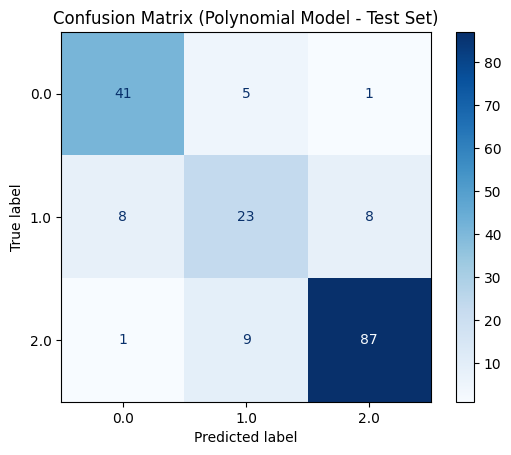


Generating One-vs-Rest ROC Curves for Polynomial Model (Test Set)...


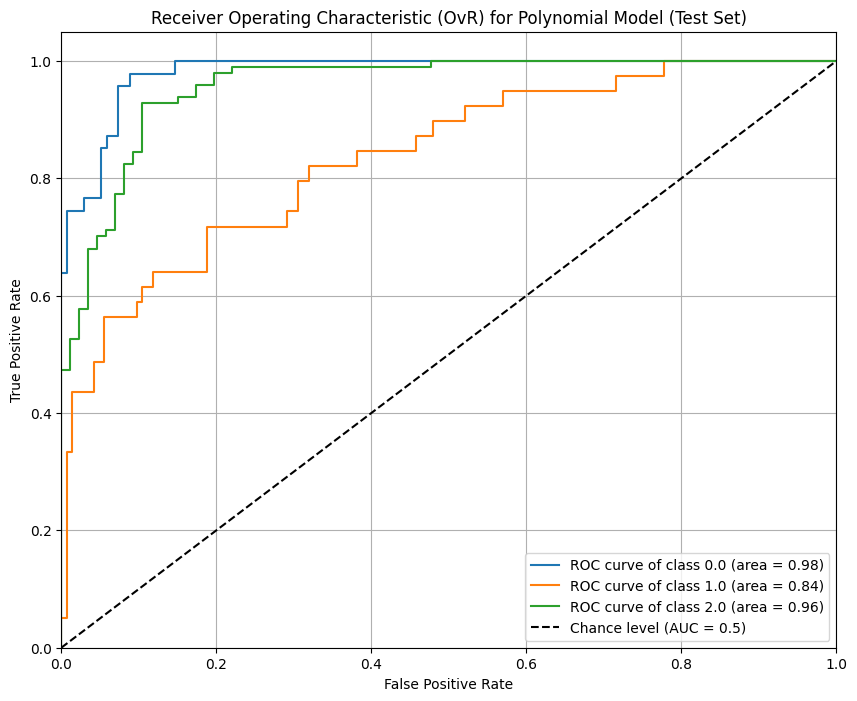

In [5]:
# Confusion Matrix for Test Set (Polynomial Features)
print("Generating Confusion Matrix for Polynomial Model (Test Set)...")
cm_test_poly = confusion_matrix(y_test, y_pred_poly)
disp_test_poly = ConfusionMatrixDisplay(confusion_matrix=cm_test_poly, display_labels=class_labels)
disp_test_poly.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Polynomial Model - Test Set)')
plt.show()

# ROC Curve (One-vs-Rest) for Test Set (Polynomial Features)
print("\nGenerating One-vs-Rest ROC Curves for Polynomial Model (Test Set)...")

y_score_test_poly = model_poly.predict_proba(X_test_poly)

fpr_test_poly = dict()
tpr_test_poly = dict()
roc_auc_test_poly = dict()

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr_test_poly[i], tpr_test_poly[i], _ = roc_curve(y_test_binarized[:, i], y_score_test_poly[:, i])
    roc_auc_test_poly[i] = auc(fpr_test_poly[i], tpr_test_poly[i])
    plt.plot(fpr_test_poly[i], tpr_test_poly[i], label=f'ROC curve of class {class_labels[i]} (area = {roc_auc_test_poly[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Chance level (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (OvR) for Polynomial Model (Test Set)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### Evaluation of Logistic Regression with Polynomial Features (Training Set)

Generating Confusion Matrix for Polynomial Model (Training Set)...


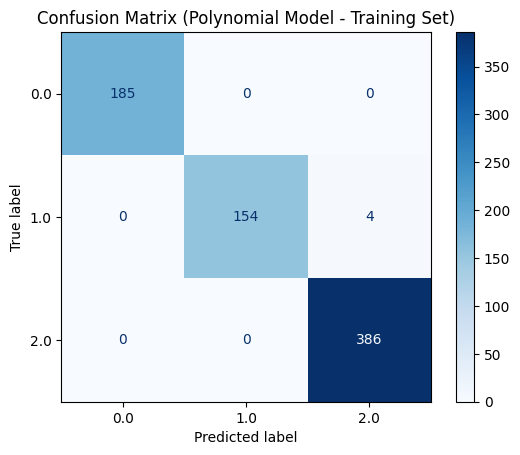


Generating One-vs-Rest ROC Curves for Polynomial Model (Training Set)...


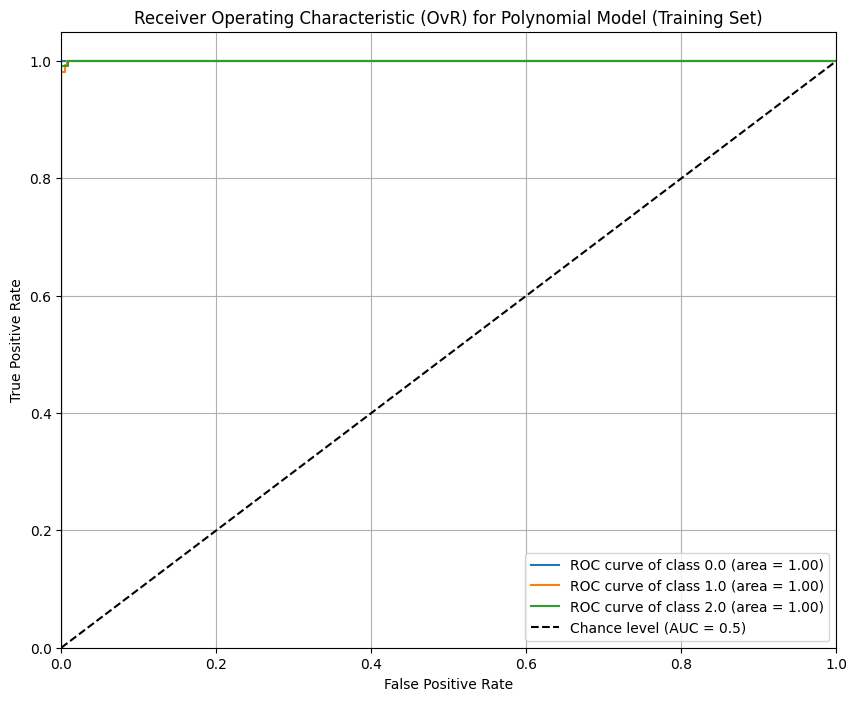

In [6]:
# Confusion Matrix for Training Set (Polynomial Features)
print("Generating Confusion Matrix for Polynomial Model (Training Set)...")
cm_train_poly = confusion_matrix(y_train, y_pred_train_poly)
disp_train_poly = ConfusionMatrixDisplay(confusion_matrix=cm_train_poly, display_labels=class_labels)
disp_train_poly.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Polynomial Model - Training Set)')
plt.show()

# ROC Curve (One-vs-Rest) for Training Set (Polynomial Features)
print("\nGenerating One-vs-Rest ROC Curves for Polynomial Model (Training Set)...")

y_score_train_poly = model_poly.predict_proba(X_train_poly)

fpr_train_poly = dict()
tpr_train_poly = dict()
roc_auc_train_poly = dict()

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr_train_poly[i], tpr_train_poly[i], _ = roc_curve(y_train_binarized[:, i], y_score_train_poly[:, i])
    roc_auc_train_poly[i] = auc(fpr_train_poly[i], tpr_train_poly[i])
    plt.plot(fpr_train_poly[i], tpr_train_poly[i], label=f'ROC curve of class {class_labels[i]} (area = {roc_auc_train_poly[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Chance level (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (OvR) for Polynomial Model (Training Set)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [4]:
from sklearn.metrics import classification_report

print("--- Original Logistic Regression Model (Test Set) ---")
print(classification_report(y_test, y_pred, target_names=[str(c) for c in class_labels]))

print("\n--- Logistic Regression with Polynomial Features Model (Test Set) ---")
print(classification_report(y_test, y_pred_poly, target_names=[str(c) for c in class_labels]))

print("\n--- Original Logistic Regression Model (Training Set) ---")
print(classification_report(y_train, y_pred_train, target_names=[str(c) for c in class_labels]))

print("\n--- Logistic Regression with Polynomial Features Model (Training Set) ---")
print(classification_report(y_train, y_pred_train_poly, target_names=[str(c) for c in class_labels]))

--- Original Logistic Regression Model (Test Set) ---
              precision    recall  f1-score   support

         0.0       0.88      0.91      0.90        47
         1.0       0.50      0.26      0.34        39
         2.0       0.77      0.91      0.83        97

    accuracy                           0.77       183
   macro avg       0.72      0.69      0.69       183
weighted avg       0.74      0.77      0.74       183


--- Logistic Regression with Polynomial Features Model (Test Set) ---
              precision    recall  f1-score   support

         0.0       0.82      0.87      0.85        47
         1.0       0.62      0.59      0.61        39
         2.0       0.91      0.90      0.90        97

    accuracy                           0.83       183
   macro avg       0.78      0.79      0.78       183
weighted avg       0.82      0.83      0.82       183


--- Original Logistic Regression Model (Training Set) ---
              precision    recall  f1-score   support
